In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [30]:
import tensorflow as tf

## Checking tensorflow version

In [31]:
tf.__version__

'2.0.0'

## Mac OS problem
Mac OS 在同時執行 numpy, keras, 和 matplotlib 的時候會出現 OMP: Error #15: Initializing libiomp5.dylib, but found libiomp5.dylib already initialized. 的錯誤，造成 kernel 死掉。google 後找到解答是要加上
<br>import os
<br>os.environ['KMP_DUPLICATE_LIB_OK']='True'
<br>就可以跑了
<br>參考答案：https://github.com/dmlc/xgboost/issues/1715

In [32]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [33]:
from tensorflow.keras.datasets import fashion_mnist as fm

In [34]:
(x_train, y_train), (x_test, y_test) = fm.load_data()

In [35]:
len(x_train)

60000

In [36]:
len(x_test)

10000

In [37]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Using interact to show fashion_mnist data

In [38]:
from ipywidgets import interact_manual

In [39]:
def show_data(n):
    plt.imshow(x_train[n], cmap = "Greys")
    print("This is a :", class_names[y_train[n]])

In [40]:
interact_manual(show_data, n=(0,59999))

interactive(children=(IntSlider(value=29999, description='n', max=59999), Button(description='Run Interact', s…

<function __main__.show_data(n)>

In [41]:
x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255

In [42]:
from tensorflow.keras.utils import to_categorical

In [43]:
y_train = to_categorical(y_train, 10)

In [44]:
y_test = to_categorical(y_test, 10)

## Using interact to show the result of one-hot

In [45]:
def syt(n):
    print(y_train[n])
interact_manual(syt, n=(0,9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.syt(n)>

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

## Changing the numbers of layers and neurons in the model
<br> I only added two layers with 100 and 30 neurons, resp. 

In [47]:
model = Sequential()

In [48]:
model.add(Dense(100, input_dim = 784, activation = "relu"))

In [49]:
model.add(Dense(30, activation = "relu"))

In [50]:
model.add(Dense(10, activation = "softmax"))

In [51]:
model.compile(loss='mse', optimizer=SGD(lr=0.01), metrics=['accuracy'])

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 30)                3030      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                310       
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


## Changing the epochs to 10 

In [53]:
model.fit(x_train, y_train, batch_size=25, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 120us/sample - loss: 0.0807 - accuracy: 0.3845
Epoch 2/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.0616 - accuracy: 0.5489
Epoch 3/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.0501 - accuracy: 0.6669
Epoch 4/10
60000/60000 [==============================] - 7s 118us/sample - loss: 0.0437 - accuracy: 0.7105
Epoch 5/10
60000/60000 [==============================] - 7s 124us/sample - loss: 0.0397 - accuracy: 0.7340
Epoch 6/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.0362 - accuracy: 0.7554
Epoch 7/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.0338 - accuracy: 0.7733
Epoch 8/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.0320 - accuracy: 0.7871
Epoch 9/10
60000/60000 [==============================] - 12s 208us/sample - loss: 0.0306 - accuracy: 0.7968
Epoc

In [54]:
result = model.predict_classes(x_test)

In [55]:
n = 8756
print('神經網路預測是:', class_names[result[n]])

神經網路預測是: T-shirt/top


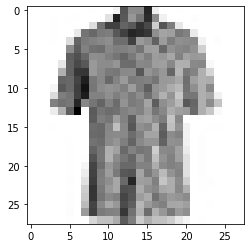

In [56]:
plt.imshow(x_test[n].reshape(28,28), cmap='Greys')